<a href="https://colab.research.google.com/github/heejjj/Health_Bio_AI/blob/bio_colab/CNN_0426.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

num_classes = 10
input_shape = (28,28,1)

(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#데이터 image data -> (R+G+B) / 3-> 0~ 255숫자-> 픽셀
#255까지의 숫자가 너무 큼.->normlization (0~1로 바꿔줌)

X_train = X_train.astype('float32') / 255 #가장 큰 수로 나눠주면 ->가장 큰값 1 image >0 ->0~1로 됨.
#image<0 -> X_ray or CT or MRI(-1000 ~ 1000)
X_test = X_test.astype('float32') / 255
     

In [ ]:
X_train.shape
#(60000 : image 갯수) 28 : row / 28:col

(60000, 28, 28)

In [ ]:
X_train = X_train.reshape(X_train.shape[0],28,28,1) 
#2D(2x2, 5x5와 같은 2d)로 넣어야 되어서 flatten을 안함. 

# X_train.shape[0] : image 수,28*28*1 reshape을 하겠다.
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Dense,Flatten
from tensorflow.keras.models import Sequential
model =  Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (28,28,1)))
#input shape을 넣어줘야함 kernal_size(3,3)
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64,kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten()) #쭉 펼쳐주기.
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))
     

In [ ]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [ ]:
model = keras.Sequential([
                          layers.Conv2D(32,kernel_size=(3,3),activation='relu', input_shape = (28, 28, 1)),
                                        layers.MaxPooling2D(pool_size=(2,2)),
                                        layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
                                        layers.MaxPooling2D(pool_size=(2,2)),
                                        layers.Flatten(),
                                        layers.Dropout(0.5), #가지치기 0.5비율로 랜덤하게 가지치기
                                        #파라미터가 많아서.
                                        layers.Dense(num_classes,activation='softmax') #num_classes = 10
                                        ])

In [ ]:
import time

start_time = time.time()
batch_size =512
epoch =30
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
hist = model.fit(X_train, y_train, batch_size = batch_size, epochs=epoch, validation_split=0.1)
#validation_split =0.1확률로 랜덤하게 split됨됨
print(f'Fit time:{time.time() - start_time}')

Epoch 1/30
106/106 [==============================] - 54s 491ms/step - loss: 0.7197 - accuracy: 0.7860 - val_loss: 0.1465 - val_accuracy: 0.9618
Epoch 2/30
106/106 [==============================] - 49s 463ms/step - loss: 0.1778 - accuracy: 0.9456 - val_loss: 0.0848 - val_accuracy: 0.9768
Epoch 3/30
106/106 [==============================] - 71s 669ms/step - loss: 0.1234 - accuracy: 0.9621 - val_loss: 0.0672 - val_accuracy: 0.9827
Epoch 4/30
106/106 [==============================] - 69s 651ms/step - loss: 0.1011 - accuracy: 0.9687 - val_loss: 0.0575 - val_accuracy: 0.9845
Epoch 5/30
106/106 [==============================] - 62s 589ms/step - loss: 0.0870 - accuracy: 0.9728 - val_loss: 0.0487 - val_accuracy: 0.9868
Epoch 6/30
106/106 [==============================] - 52s 488ms/step - loss: 0.0780 - accuracy: 0.9765 - val_loss: 0.0447 - val_accuracy: 0.9883
Epoch 7/30
106/106 [==============================] - 54s 509ms/step - loss: 0.0686 - accuracy: 0.9788 - val_loss: 0.0421 - val_ac

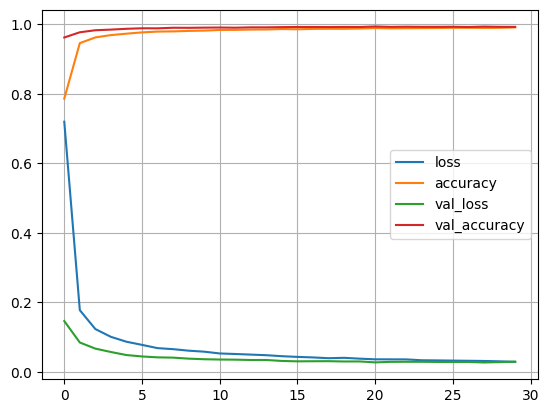

In [ ]:
import matplotlib.pyplot as plt

plot_target = ['loss', 'accuracy', 'val_loss', 'val_accuracy']
plt.figure()
for each in plot_target:
  plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

# Test

In [ ]:
score = model.evaluate(X_test, y_test)
print(f'Test Loss: {score[0]}')
print(f'TEst Acuuracy : {score[1]}')

313/313 [==============================] - 3s 10ms/step - loss: 0.0245 - accuracy: 0.9923
Test Loss: 0.024524863809347153
TEst Acuuracy : 0.9922999739646912


#데이터 예측

In [ ]:
import numpy as np
predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 [==============================] - 3s 8ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

#틀린 데이터 모으으기

In [ ]:
wrong_result = []
for n in range(0, len(y_test)):
  if predicted_labels[n] !=y_test[n]:
    wrong_result.append(n)


len(wrong_result)

77

# 틀린 데이터 16개만 직접 그려보기

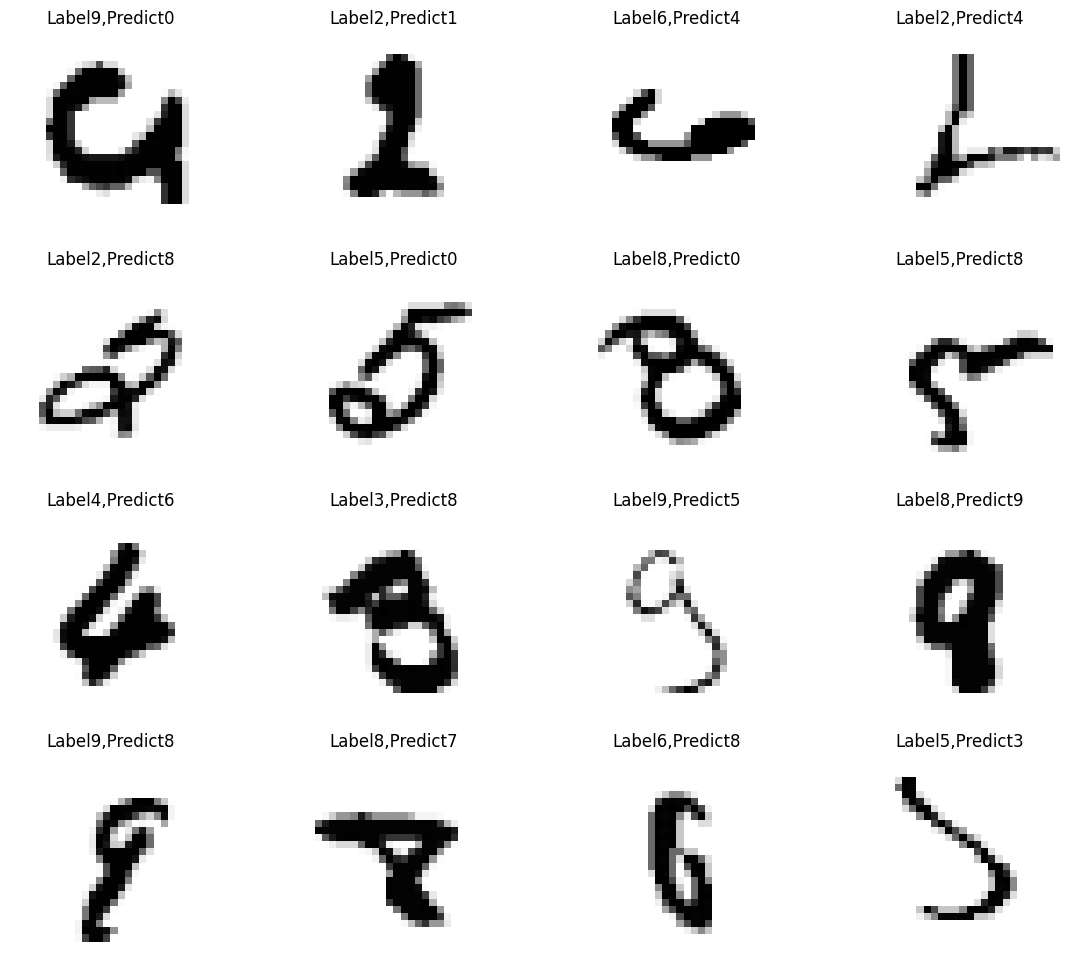

In [ ]:
import random

samples = random.choices(population = wrong_result,k=16)

plt.figure(figsize=(14,12))

for idx,n in enumerate(samples):
    plt.subplot(4,4,idx+1)
    plt.imshow(X_test[n].reshape(28,28), cmap = 'Greys',interpolation='nearest')
    plt.title('Label' +str(y_test[n]) + ',Predict'+ str(predicted_labels[n]))
    plt.axis('off')
plt.show()

## MNIST with class

In [ ]:
keras.__version__

'2.12.0'

In [ ]:
from keras import layers, models

class CNN(models.Sequential):
  def __init__(self, input_shape, num_classes):
    super().__init__()

    self.add(layers.Conv2D(32, kernel_size=(3,3),
                           activation='relu',
                           input_shape=input_shape))
    self.add(layers.Conv2D(64,(3,3), activation='relu'))
    self.add(layers.MaxPooling2D(pool_size=(2,2)))
    self.add(layers.Dropout(0.25))
    self.add(layers.Flatten())
    self.add(layers.Dropout(0.5))
    self.add(layers.Dense(num_classes, activation='softmax'))

    self.compile(loss=keras.losses.categorical_crossentropy,
                 optimizer='rmsprop',
                 metrics=['accuracy'])

In [ ]:
# Dataset 준비
from tensorflow import keras
from keras import datasets
from keras import backend 

class DATA():
    def __init__(self):
        num_classes = 10

        (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
        img_rows, img_cols = x_train.shape[1:]

        if backend.image_data_format() == 'channels_first':
            x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
            x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
            input_shape = (1, img_rows, img_cols)
        else:
            x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
            x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
            input_shape = (img_rows, img_cols, 1)

        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        x_train /= 255
        x_test /= 255

        y_train = keras.utils.to_categorical(y_train, num_classes)
        y_test = keras.utils.to_categorical(y_test, num_classes)
        
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.x_train, self.y_train = x_train, y_train
        self.x_test, self.y_test = x_test, y_test  


In [ ]:
def plot_acc(history, title=None, show_flag=False):
    # summarize history for accuracy
    if not isinstance(history, dict): #isinstance : 파이썬 자료형을 확인하는 것.
        history = history.history
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    if title is not None:
        plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accracy')
    plt.legend(['Training', 'Validation'], loc=0)
    if show_flag:
        plt.show()
def plot_loss(history, title=None, show_flag=False):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Training', 'Validation'], loc=0)
    if show_flag:
        plt.show()    


def plot_history(history):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plot_acc(history)
    plt.subplot(1, 2, 2)
    plot_loss(history)
 
def plot_loss_acc(history):
    plot_loss(history, '(a) Loss trajectory')
    plt.show()            
    plot_acc(history, '(b) Accracy trajectory')
    plt.show()
def plot_acc_loss(history):
    plot_acc(history, '(a) Accracy trajectory')
    plt.show()
    plot_loss(history, '(b) Loss trajectory')
    plt.show()            

Epoch 1/10
375/375 [==============================] - 143s 379ms/step - loss: 0.2719 - accuracy: 0.9150 - val_loss: 0.0931 - val_accuracy: 0.9736
Epoch 2/10
375/375 [==============================] - 130s 348ms/step - loss: 0.0976 - accuracy: 0.9703 - val_loss: 0.0691 - val_accuracy: 0.9798
Epoch 3/10
375/375 [==============================] - 132s 352ms/step - loss: 0.0760 - accuracy: 0.9767 - val_loss: 0.0585 - val_accuracy: 0.9834
Epoch 4/10
375/375 [==============================] - 129s 345ms/step - loss: 0.0640 - accuracy: 0.9807 - val_loss: 0.0552 - val_accuracy: 0.9840
Epoch 5/10
375/375 [==============================] - 127s 338ms/step - loss: 0.0566 - accuracy: 0.9825 - val_loss: 0.0490 - val_accuracy: 0.9851
Epoch 6/10
375/375 [==============================] - 130s 347ms/step - loss: 0.0520 - accuracy: 0.9844 - val_loss: 0.0466 - val_accuracy: 0.9858
Epoch 7/10
375/375 [==============================] - 131s 350ms/step - loss: 0.0477 - accuracy: 0.9855 - val_loss: 0.0463 -

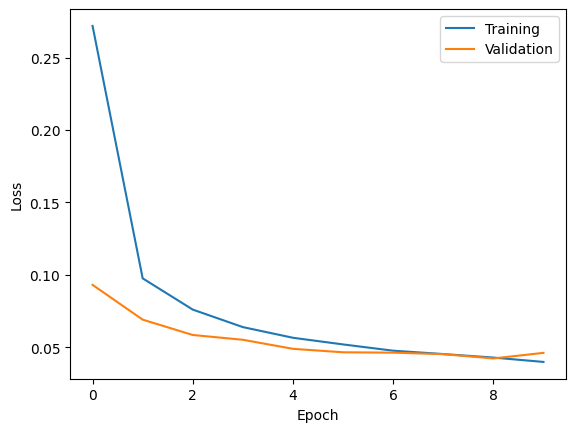

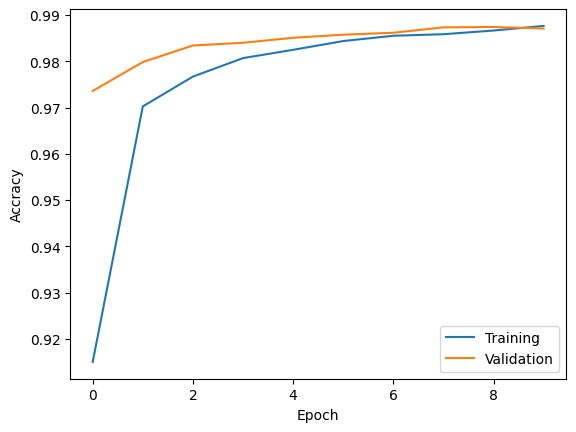

In [ ]:
batch_size = 128
epochs = 10

data = DATA()
model = CNN(data.input_shape, data.num_classes)

history = model.fit(data.x_train, data.y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2)

score = model.evaluate(data.x_test, data.y_test)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plot_loss(history)
plt.show()
plot_acc(history)
plt.show()
     

In [ ]:
#maxpooling으로 정보량 줄어들면 depth를 늘여서 보완함 


In [ ]:

!pip install jupyter-tensorboard

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.1 MB/s eta 0:00:00
  Created wheel for jupyter-tensorboard: filename=jupyter_tensorboard-0.2.0-py2.py3-none-any.whl size=15260 sha256=aa96c7ca9997c30e05da4221592f6f492c67a55a83e1e5bd499f5a027c23a17f
  Stored in directory: /root/.cache/pip/wheels/98/03/14/670a2eefd86be0e21a529c469cadc2148cbeb00d82937e5aa2
Successfully built jupyter-tensorboard
